### Time Series Analysis of Daily Electricity Consumption

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Load the dataset
df = pd.read_csv("C:/Users/bbuser/Desktop/DataScience-Brain-Bytes/Team_members/from_alzahra/data/household_power_consumption.txt", sep=";", low_memory=False)
print(df.head())

         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  


#### Convert Date and Time to datetime

In [15]:
# Combine 'Date' and 'Time' into one column
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%d/%m/%Y %H:%M:%S") #matches the dataset's day-first format

# Check result
print(df["Datetime"].head())

0   2006-12-16 17:24:00
1   2006-12-16 17:25:00
2   2006-12-16 17:26:00
3   2006-12-16 17:27:00
4   2006-12-16 17:28:00
Name: Datetime, dtype: datetime64[ns]


#### Set the Datetime as the Index

In [16]:
# Set datetime as index
df.set_index("Datetime", inplace=True)

# Drop original Date and Time columns if not needed
df.drop(columns=["Date", "Time"], inplace=True)


In [18]:
#Check the Result 
print(df.head())
print("\nIndex Type:", type(df.index))

                    Global_active_power Global_reactive_power  Voltage  \
Datetime                                                                 
2006-12-16 17:24:00               4.216                 0.418  234.840   
2006-12-16 17:25:00               5.360                 0.436  233.630   
2006-12-16 17:26:00               5.374                 0.498  233.290   
2006-12-16 17:27:00               5.388                 0.502  233.740   
2006-12-16 17:28:00               3.666                 0.528  235.680   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
Datetime                                                             
2006-12-16 17:24:00           18.400          0.000          1.000   
2006-12-16 17:25:00           23.000          0.000          1.000   
2006-12-16 17:26:00           23.000          0.000          2.000   
2006-12-16 17:27:00           23.000          0.000          1.000   
2006-12-16 17:28:00           15.800          0.000          

#### Convert Numeric Columns

In [19]:
# Convert all other columns to numeric (force errors to NaN)
df = df.apply(pd.to_numeric, errors='coerce')

# Check for missing values
print(df.isnull().sum())

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


#### Time-Based Slicing

In [20]:
# Example: Slice data for January 2007
january_data = df.loc["2007-01"]

# Preview
print(january_data.head())

                     Global_active_power  Global_reactive_power  Voltage  \
Datetime                                                                   
2007-01-01 00:00:00                2.580                  0.136   241.97   
2007-01-01 00:01:00                2.552                  0.100   241.75   
2007-01-01 00:02:00                2.550                  0.100   241.64   
2007-01-01 00:03:00                2.550                  0.100   241.71   
2007-01-01 00:04:00                2.554                  0.100   241.98   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Datetime                                                                
2007-01-01 00:00:00              10.6             0.0             0.0   
2007-01-01 00:01:00              10.4             0.0             0.0   
2007-01-01 00:02:00              10.4             0.0             0.0   
2007-01-01 00:03:00              10.4             0.0             0.0   
2007-01-01 00:04:00          

#### Resample the Data

In [22]:
# Daily mean power consumption
daily = df["Global_active_power"].resample("D").mean()

# Weekly mean
weekly = df["Global_active_power"].resample("W").mean()

# Monthly mean
monthly = df["Global_active_power"].resample("ME").mean()

In [24]:
# Check for the output
# Print first 5 values of each
print("^-^ Daily Average Power:")
print(daily.head(), "\n")

print("^-^ Weekly Average Power:")
print(weekly.head(), "\n")

print("^-^ Monthly Average Power:")
print(monthly.head())

^-^ Daily Average Power:
Datetime
2006-12-16    3.053475
2006-12-17    2.354486
2006-12-18    1.530435
2006-12-19    1.157079
2006-12-20    1.545658
Freq: D, Name: Global_active_power, dtype: float64 

^-^ Weekly Average Power:
Datetime
2006-12-17    2.505248
2006-12-24    1.734186
2006-12-31    1.958376
2007-01-07    1.484233
2007-01-14    1.604954
Freq: W-SUN, Name: Global_active_power, dtype: float64 

^-^ Monthly Average Power:
Datetime
2006-12-31    1.901295
2007-01-31    1.546034
2007-02-28    1.401084
2007-03-31    1.318627
2007-04-30    0.891189
Freq: ME, Name: Global_active_power, dtype: float64


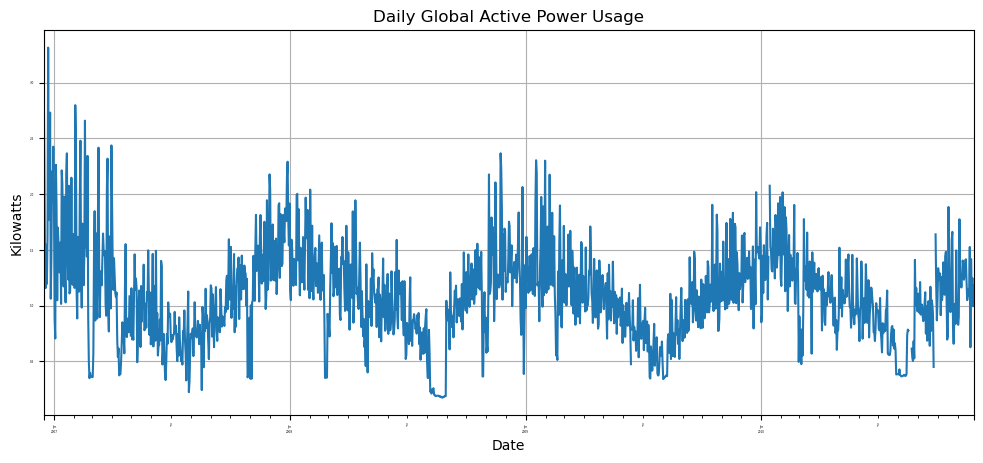

In [31]:
# Plot daily trend
plt.figure(figsize=(12, 5))
daily.plot(title="Daily Global Active Power Usage",fontsize=2)
plt.ylabel("Kilowatts",)
plt.xlabel("Date")
plt.grid(True)
plt.show()